Enter the number of data points you are about to give
6
Enter the data points x f(x) format seperated by space
 x f(x) 1 : 0 0
 x f(x) 2 : 10 227.04
 x f(x) 3 : 15 362.78
 x f(x) 4 : 20 517.35
 x f(x) 5 : 22.5 602.97
 x f(x) 6 : 30 901.67
Enter the point x at which you want to find value of the function 
16
+------------------------+----------------------+-------------------------+-----------------------+
|      Method Name       | Linear with Error(%) | Quadratic with Error(%) |  Qubic with Error(%)  |
+------------------------+----------------------+-------------------------+-----------------------+
|  Direct Interpolation  |  393.69399999999996  |         392.1876        |   392.05716799999993  |
|                        |         ---          |   0.3841018940935372%   |  0.03326861760120699% |
|    Lagrange method     |       393.694        |    392.1875999999999    |       392.057168      |
|                        |         ---          |   0.3841018940935662%   |  0.033268617601

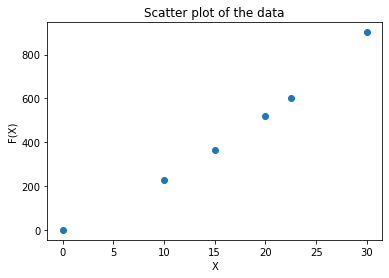

In [21]:
#INTERPOLATION
#2019331076

from prettytable import PrettyTable

import matplotlib.pyplot as plt

import numpy as np



def gaussian_partial_pivoting(matrix , n):
    step = 1
    for i in range(0,n-1):
        
        max_row, val = i, 0
        for j in range(i, n):
            if(abs(matrix[j][i]) > val):
                val = abs(matrix[j][i])
                max_row = j  
        
        for k in range(0, n+1):
            matrix[i][k],matrix[max_row][k] = matrix[max_row][k],matrix[i][k]
        
        for j in range(i+1,n):
            
            try:
                val = matrix[j][i]/matrix[i][i]
                
            except:
                print("Division By Zerro Error. Couldn't find solution")
                return False
                
            for k in range(i,n+1):
                matrix[j][k]-= (val*matrix[i][k])
        
        
        
        

    solution = [0 for k in range(n)]

    for i in range(n-1,-1,-1):
        try:
            solution[i]=matrix[i][n]/matrix[i][i]
        except:
            
            print("Division By Zerro Error. Couldn't find solution")
            return False
            
        for j in range(i-1,-1,-1):
            matrix[j][n] -= (matrix[j][i]*solution[i])


    return solution



def Direct_interpolation(data,val):
    
    matrix1 = [[0.0 for j in range(3)] for i in range(2)]
    matrix2 = [[0.0 for j in range(4)] for i in range(3)]
    matrix3=[[0.0 for j in range(5)] for i in range(4)]
    
    ans1=-1
    
    if(len(data)>=2):
        
         
        for i in range(2):
            matrix1[i][0]=1     #a0
            matrix1[i][1]=data[i][1] #a1 = x  
            matrix1[i][2]=data[i][2] # f(x)
            
        
        
        solution = gaussian_partial_pivoting(matrix1,2)
        
        ans1 = solution[0]+solution[1]*val
        
        
    ans2=-1
    ans3=-1
    
    if(len(data)>=3):
        
         
        for i in range(3):
            matrix2[i][0]=1     #a0
            matrix2[i][1]=data[i][1] #a1 = x  
            matrix2[i][2]=data[i][1]*data[i][1] #a2=x^2
            matrix2[i][3]=data[i][2]   # f(x)
            
        
        
        solution = gaussian_partial_pivoting(matrix2,3)
        
        ans2 = solution[0]+solution[1]*val+solution[2]*val*val
        
    
    if(len(data)>=4):
        
         
        for i in range(4):
            matrix3[i][0]=1     #a0
            
            matrix3[i][1]=data[i][1] #a1 = x  
            
            matrix3[i][2]=data[i][1]*data[i][1] #a2=x^2
            
            matrix3[i][3]=data[i][1]*data[i][1]*data[i][1] #a3=x^3
            
            matrix3[i][4]=data[i][2]   # f(x)
            
        
        
        solution = gaussian_partial_pivoting(matrix3,4)
        
        ans3 = solution[0]+solution[1]*val+solution[2]*val*val+solution[3]*val*val*val
        
    
        
        error1 = abs(ans1 - ans2)/ans2
        error2 = abs(ans2-ans3)/ans3
        error1 *= 100.0
        error2 *= 100.0
        
        
    my_table.add_row(["Direct Interpolation", str( str(ans1) + "\n" + "---"  ),str( str(ans2) + "\n" + str(error1)+"%" ),str( str(ans3) + "\n" + str(error2)+"%" )])
    
     

    
def do_lagrange(x,y,val):
    
    ans = 0
    
    n= len(x)
    
    for i in range(n):
        l = 1
        for j in range(n):
            if i!=j:
                l *= (val-x[j])/(x[i]-x[j])
        
        ans += y[i]*l

    
    return ans
    
    
def Lagrange_method(data,val):
    
    #linear interpolation
    
    x=[ data[ 0 ] [ 1 ] , data[ 1 ][ 1 ] ] #closest 2 data points
    
    y=[ data[ 0 ] [ 2 ] , data[ 1 ][ 2 ] ] #closest 2 data points
    
    ans1 = do_lagrange( x , y , val )
    
    
        
        
                
    
   #quadratic nterpolation
   
    x.append( data[2][1]  )
    y.append(data[2][2] )

    ans2 = do_lagrange( x, y , val)
    
    #qubic interpolation
    
    x.append(data[3][1])
    
    y.append(data[3][2])
    
    ans3=do_lagrange(x,y , val)
    
    error1 = abs(ans1 - ans2)/ans2
    error2 = abs(ans2-ans3)/ans3
    error1 *= 100.0
    error2 *= 100.0
        
    
    my_table.add_row(["Lagrange method",str( str(ans1) + "\n" + "---"  ),str( str(ans2) + "\n" + str(error1)+"%" ),str( str(ans3) + "\n" + str(error2)+"%" )])

    

    
def do_newton_divided(x,y,val):
    n=len(x)
    
    data_table = [[0.0 for j in range(n)] for i in range(n)]
   
    for i in range(n):
        data_table[i][0]=y[i]
    
    for j in range(n-1):
        for i in range(j+1,n):
            data_table[i][j+1] = ( data_table[i][j] - data_table[j][j] ) / ( x[i] - x[j] )
             
    
    
    ans = data_table[0][0]
    
    for i in range(n-1):
        
        tmp = 1
        
        for j  in range(i+1):
            
            tmp *= (val-x[j])
    
        ans += tmp * data_table[i+1][i+1] 
    
    
    
    return ans
    
    

    
def newtons_divided_difference(data,val):
    
    #Linear newtons divided
    
    x=[ data[ 0 ] [ 1 ] , data[ 1 ][ 1 ] ] #closest 2 data points
    
    y=[ data[ 0 ] [ 2 ] , data[ 1 ][ 2 ] ] #closest 2 data points
    
    ans1 = do_newton_divided( x , y , val )
    
    #quadratic newtons divided
   
    x.append( data[2][1]  )
    y.append(data[2][2] )

    ans2 = do_newton_divided( x, y , val)
    
    #qubic newtons divided 
    
    x.append(data[3][1])
    
    y.append(data[3][2])
    
    ans3=do_newton_divided(x,y , val)
    
    error1 = abs(ans1 - ans2)/ans2
    error2 = abs(ans2-ans3)/ans3
    error1 *= 100.0
    error2 *= 100.0
        
    
    my_table.add_row(["Newtons divided method",str( str(ans1) + "\n" + "---"  ),str( str(ans2) + "\n" + str(error1)+"%" ),str( str(ans3) + "\n" + str(error2)+"%" )  ])
    
    
    
    
    
    
    


number_of_data_points = int(input("Enter the number of data points you are about to give\n"))

print("Enter the data points x f(x) format seperated by space")

x=[]

y=[]


for i in range(0,number_of_data_points):
    
    data = input(" x f(x) {} : ".format(i+1)).split()
    
    x.append(float(data[0]))
    y.append(float(data[1]))
    

val = float(input("Enter the point x at which you want to find value of the function \n"))

my_table = PrettyTable(['Method Name',"Linear with Error(%)","Quadratic with Error(%)","Qubic with Error(%)"])





data = []

for i in range(number_of_data_points):
    data.append([abs(val-x[i]),x[i],y[i]])
    
data.sort()
Direct_interpolation(data,val)
Lagrange_method(data,val)
newtons_divided_difference(data,val)


print(my_table)


plt.scatter(np.array(x),np.array(y))

plt.title("Scatter plot of the data")
plt.xlabel("X")
plt.ylabel("F(X)")
plt.show()
